In [77]:
import matplotlib.pyplot as plt
import math
import os

if not os.path.exists("./img"):
    os.makedirs("./img")

def process():
    dict = {}
    f = open("result.txt")
    lines = f.readlines()
    for line in lines:
        c = line.split(",") 
        #c[0]: method, c[1]: theta, c[2]: input size(bs num) 
        #c[3]: en num, c[4]: cost, c[5]: time

        method = c[0]
        theta = c[1]
        bs_num = c[2]
        
        c[5] = c[5].replace("\n","")
        if theta in dict:
            if method in dict[theta]:
                if bs_num in dict[theta][method]:
                    dict[theta][method][bs_num].append([c[3], c[4], c[5]])
                else:
                    dict[theta][method].update({bs_num: [[c[3], c[4], c[5]]]})
            else:
                dict[theta].update({method: {}})
        else:
            dict.update({theta: {}})
            
    f.close()
    return dict
dict = process()
#print(dict) 

In [78]:
def getStatistic(dict):
    for t in dict:
        for m in dict[t]:
            for bs in dict[t][m]:
                en = 0
                cost = 0
                time = 0
                for value in dict[t][m][bs]:
                    #print(value)
                    en = en + int(value[0])
                    cost = cost + int(float(value[1]))
                    time = time + float(value[2])
                en = math.ceil(en / len(dict[t][m][bs]))
                cost = math.ceil(cost / len(dict[t][m][bs]))
                time = float("{:.2f}".format(time / len(dict[t][m][bs])))
                
                dict[t][m][bs] = [en, cost, time]

getStatistic(dict)
#print(dict)

{'greedy_new_fine': [83.5, 93.0, 104.0, 126.5, 144.0, 183.8, 210.0, 274.0, 329.5, 380.5, 432.0], 'greedy_new': [628.5, 774.5, 975.7, 1204.5, 1835.8, 1848.1, 2469.6, 4102.3, 6945.0, 9080.0, 10161.8], 'greedy_new_avg': [188.9, 213.7, 237.4, 291.6, 334.8, 413.9, 502.0, 678.6, 838.5, 991.7, 1155.2], 'greedy_avg': [193.2, 221.2, 243.9, 301.9, 346.9, 444.8, 538.2, 750.8, 954.7, 1103.8, 1327.2], 'greedy': [657.3, 906.8, 1042.4, 1355.1, 1894.3, 1857.1, 2777.0, 4934.8, 7703.5, 10265.4, 12461.9], 'greedy_fine': [83.5, 94.0, 104.0, 126.5, 143.5, 179.5, 210.5, 277.0, 333.0, 387.5, 446.0], 'mip_cluster': [262.649, 307.934, 348.173, 435.554, 522.421, 693.1, 870.495, 1292.538, 1724.149, 2143.881, 2610.671], 'mip': [262.65, 307.935, 348.174, 435.556, 522.394, 693.159, 870.488, 1292.541, 1724.257, 2144.045, 2610.656]}


<Figure size 960x720 with 0 Axes>

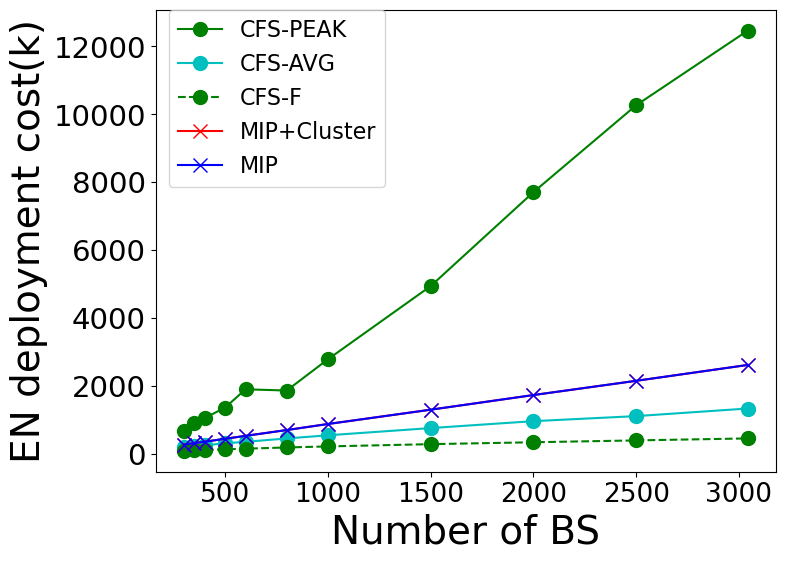

In [79]:
# dict[theta][method][bs_num] ->[en, cost, time]
plt.figure(dpi=150)
font = 28

def plotCost():
    theta = "0.1" # 14.0
    #"200", "250",
    x = [ "300", "350","400","500","600", "800", "1000", "1500", "2000", "2500", "3042"]
#     x = ["800","1000", "1500", "2000", "2500", "2769"]
    #x = ["150", "200", "300", "400","500", "600", "800","1000", "1500", "2000", "2500", "2769"]
    #x = ["150", "200", "250", "300", "350","400","450","500"]
    plot_dict = {}
#     random = []
#     greedy = []
#     greedy_new = []
    
    for method in dict[theta]:
        for i in x:
            if method in plot_dict:
                if i in dict[theta][method]:
                    value = dict[theta][method][i][1]
                    plot_dict[method].append(value/1000)
            else:
                if method in dict[theta]:
                    value = dict[theta][method][i][1]
                    plot_dict.update({method:[value/1000]})
    
    
    print(plot_dict)
    # plot_dict['mip'][-1] = 220
    
    #fig,ax = plt.subplots()
    fig = plt.figure(figsize=(8, 6))
    
    plt.xlabel(r'Number of BS', fontsize=font)
    plt.ylabel(r'EN deployment cost(k)', fontsize=font)
    
    plt.xticks(fontsize=19)
    plt.yticks(fontsize=21)

    n = [int(i) for i in x]
    #markersize=15, linewidth = 3,
    #plt.plot(n, plot_dict['random'], "y.-",  label="Random")
    plt.plot(n, plot_dict['greedy'], "go-",  label="CFS-PEAK", markersize=10)
    # plt.plot(n, plot_dict['greedy_new'], "yv-",label="DA-CFS-PEAK", markersize=10)
    plt.plot(n, plot_dict['greedy_avg'], "co-",label="CFS-AVG", markersize=10)
    # plt.plot(n, plot_dict['greedy_new_avg'], "v-", color="#F39C12", label="DA-CFS-AVG", markersize=10)
    plt.plot(n, plot_dict['greedy_fine'], "go--",label="CFS-F", markersize=10)
    # plt.plot(n, plot_dict['greedy_new_fine'], "yv--",label="DA-CFS-F", markersize=10)
    plt.plot(n, plot_dict['mip_cluster'], "rx-",label="MIP+Cluster", markersize=10)
    
    plt.plot(n, plot_dict['mip'], "bx-",label="MIP", markersize=10)

#     plt.plot(n[0:len(plot_dict['mip'])], plot_dict['mip'], "mx-",label="MIP", markersize=10)
    
    
    plt.legend(bbox_to_anchor=(0.37, 1), loc=1, borderaxespad=0., fontsize = 16)

    #plt.grid(True)

    plt.savefig('./img/cost.png', bbox_inches = 'tight')
    
plotCost()

In [80]:
# dict[theta][method][bs_num] ->[en, cost, time]
plt.figure(dpi=150)

def plotCostMIP():
    theta = "0.1" # 14.0
    #"200", "250",
    x = [ "300", "350","400","500","600", "800", "1000", "1500", "2000", "2500", "3042"]
#     x = ["800","1000", "1500", "2000", "2500", "2769"]
    #x = ["150", "200", "300", "400","500", "600", "800","1000", "1500", "2000", "2500", "2769"]
    #x = ["150", "200", "250", "300", "350","400","450","500"]
    plot_dict = {}
#     random = []
#     greedy = []
#     greedy_new = []
    
    for method in dict[theta]:
        for i in x:
            if method in plot_dict:
                if i in dict[theta][method]:
                    value = dict[theta][method][i][1]
                    plot_dict[method].append(value/1000)
            else:
                if method in dict[theta]:
                    value = dict[theta][method][i][1]
                    plot_dict.update({method:[value/1000]})
            
    print(plot_dict)
    
    #fig,ax = plt.subplots()
    fig = plt.figure(figsize=(8, 6))
    
    plt.xlabel(r'Number of BS', fontsize=font)
    plt.ylabel(r'EN deployment cost(k)', fontsize=font)
    
    plt.xticks(fontsize=19)
    plt.yticks(fontsize=21)

    n = [int(i) for i in x]
    #markersize=15, linewidth = 3,
    #plt.plot(n, plot_dict['random'], "y.-",  label="Random")
#     plt.plot(n, plot_dict['greedy'], "go-",  label="CFS-PEAK", markersize=10)
#     plt.plot(n, plot_dict['greedy_new'], "yv-",label="DA-CFS-PEAK", markersize=10)
#     plt.plot(n, plot_dict['greedy_avg'], "co-",label="CFS-AVG", markersize=10)
#     plt.plot(n, plot_dict['greedy_new_avg'], "v-", color="#F39C12", label="DA-CFS-AVG", markersize=10)
#     plt.plot(n, plot_dict['greedy_fine'], "go-.",label="CFS-F", markersize=10)
#     plt.plot(n, plot_dict['greedy_new_fine'], "yv-.",label="DA-CFS-F", markersize=10)
    plt.plot(n, plot_dict['mip_cluster'], "rx-",label="MIP+Cluster (10 min)", markersize=10)
    plt.plot(n, plot_dict['mip_cluster_2'], "mX--",label="MIP+Cluster (1h)", markersize=10)
    

#     plt.plot(n[0:len(plot_dict['mip'])], plot_dict['mip'], "mx-",label="MIP", markersize=10)
    
    
    plt.legend(bbox_to_anchor=(0.52, 1), loc=1, borderaxespad=0., fontsize = 16)

    #plt.grid(True)
    plt.savefig('./img/costMIP.png', bbox_inches = 'tight')
    
# plotCostMIP()

<Figure size 960x720 with 0 Axes>

{'greedy_new_fine': [83.5, 93.0, 104.0, 118.5, 126.5, 183.8, 210.0, 274.0, 329.5, 380.5, 432.0], 'greedy_new': [628.5, 774.5, 975.7, 1048.8, 1204.5, 1848.1, 2469.6, 4102.3, 6945.0, 9080.0, 10161.8], 'greedy_new_avg': [188.9, 213.7, 237.4, 263.6, 291.6, 413.9, 502.0, 678.6, 838.5, 991.7, 1155.2], 'greedy_avg': [193.2, 221.2, 243.9, 270.2, 301.9, 444.8, 538.2, 750.8, 954.7, 1103.8, 1327.2], 'greedy': [657.3, 906.8, 1042.4, 1348.2, 1355.1, 1857.1, 2777.0, 4934.8, 7703.5, 10265.4, 12461.9], 'greedy_fine': [83.5, 94.0, 104.0, 114.0, 126.5, 179.5, 210.5, 277.0, 333.0, 387.5, 446.0], 'mip_cluster': [262.649, 307.934, 348.173, 390.923, 435.554, 693.1, 870.495, 1292.538, 1724.149, 2143.881, 2610.671], 'mip': [262.65, 307.935, 348.174, 390.924, 435.556, 693.159, 870.488, 1292.541, 1724.257, 2144.045, 2610.656]}


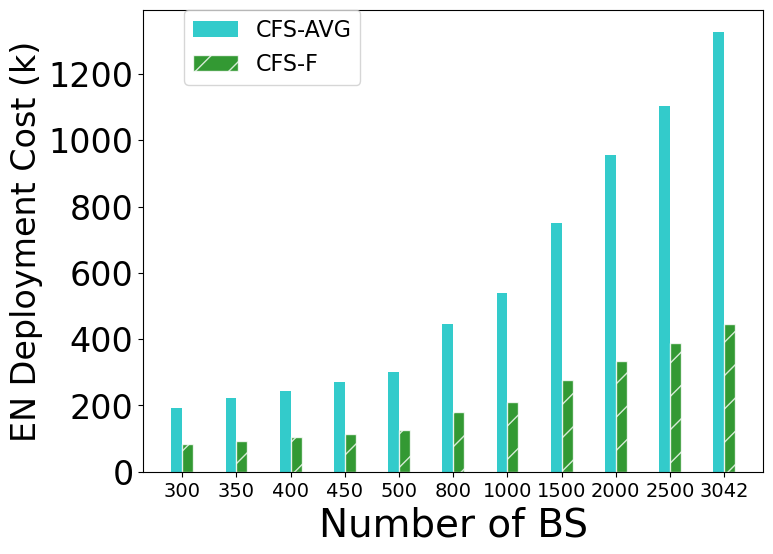

In [81]:
def plotAvg():
    theta = "0.1"
#     x = ["200", "500", "1000", "1500", "2000", "2500", "2769"]
    x = [ "300", "350","400","450","500","800", "1000", "1500", "2000", "2500", "3042"]
    plot_dict = {}
    
    for method in dict[theta]:
        for i in x:
            if method in plot_dict:
                if i in dict[theta][method]:
                    value = dict[theta][method][i][1]
                    plot_dict[method].append(value/1000)
                else:
                    plot_dict[method].append(0)
            else:
                value = dict[theta][method][i][1]
                plot_dict.update({method:[value/1000]})
            
    print(plot_dict)
    
    
    #fig,ax = plt.subplots()
    fig = plt.figure(figsize=(8, 6))
    
    plt.xlabel(r'Number of BS', fontsize=font)
    plt.ylabel(r'EN Deployment Cost (k)', fontsize=24)

    r = range(1, len(plot_dict['greedy'])+1)

    p_greedy_avg = [i - 0.1 for i in r]
    # p_greedy_new_avg = [i - 0.2 for i in r]
    p_greedy_fine = [i + 0.1 for i in r]
    # p_greedy_new_fine = [i + 0.2 for i in r]
    #print(p_random)
                 
    bar1 = plt.bar(p_greedy_avg,plot_dict['greedy_avg'],width = 0.2, alpha = 0.8,color = 'c', label = 'CFS-AVG')
    # bar2 = plt.bar(p_greedy_new_avg,plot_dict['greedy_new_avg'],width = 0.2, alpha = 0.8,color = '#F39C12', label = 'DA-CFS-AVG')
    bar3 = plt.bar(p_greedy_fine,plot_dict['greedy_fine'],width = 0.2, alpha = 0.8,color = 'g',hatch = '/', edgecolor='w', label = 'CFS-F')
    # bar4 = plt.bar(p_greedy_new_fine,plot_dict['greedy_new_fine'],width = 0.2, alpha = 0.8,color = 'y', hatch = '\\', edgecolor='w',label = 'DA-CFS-F')
    
    #n = [int(i)/100 for i in x]
    
    plt.yticks(fontsize=24)
    plt.xticks(r,x, fontsize=14) 
    plt.legend(bbox_to_anchor=(0.35, 1), loc=1, borderaxespad=0., fontsize=16)

    plt.savefig('./img/cost_avg.png', bbox_inches = 'tight')
    #plt.grid(True)
    
plotAvg()

{'greedy_new_fine': [0.35, 0.63, 1.28, 1.88, 2.59, 3.6, 5.07, 8.71, 15.02, 23.06, 37.2], 'greedy_new': [0.07, 0.11, 0.23, 0.4, 0.6, 1.24, 2.03, 5.13, 10.3, 17.13, 28.07], 'greedy_new_avg': [0.08, 0.14, 0.33, 0.55, 0.81, 1.61, 2.73, 7.0, 13.41, 22.48, 35.7], 'greedy_avg': [0.07, 0.14, 0.31, 0.54, 0.78, 1.57, 2.64, 6.86, 13.17, 22.12, 35.66], 'greedy': [0.05, 0.11, 0.22, 0.46, 0.63, 1.24, 2.04, 5.28, 10.19, 16.26, 25.8], 'greedy_fine': [0.27, 0.64, 1.17, 1.98, 3.77, 3.94, 5.68, 9.32, 16.84, 23.11, 36.05], 'mip_cluster': [0.25, 0.45, 0.67, 0.97, 1.02, 1.93, 3.02, 6.14, 9.64, 16.0, 22.9], 'mip': [0.25, 0.57, 1.07, 1.66, 2.46, 4.33, 7.05, 17.26, 40.62, 70.46, 111.92]}


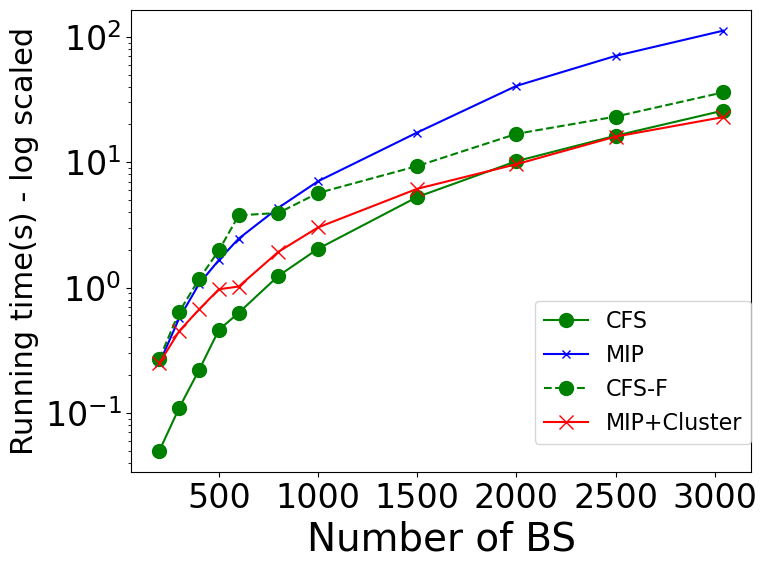

In [82]:
def plotTimeLine():
    theta = "0.1"
    x = ["200", "300", "400","500","600", "800", "1000", "1500", "2000", "2500", "3042"]
    plot_dict = {}
    
    for method in dict[theta]:
        for i in x:
            if method in plot_dict:
                if i in dict[theta][method]:
                    value = dict[theta][method][i][2]
                    plot_dict[method].append(value)
            else:
                if method in dict[theta]:
                    value = dict[theta][method][i][2]
                    plot_dict.update({method:[value]})
            
    print(plot_dict)
    
    #fig,ax = plt.subplots()
    fig = plt.figure(figsize=(8, 6))
    plt.yscale("log")
    
    plt.xlabel(r'Number of BS', fontsize=font)
    plt.ylabel(r'Running time(s) - log scaled', fontsize=22)
#     plt.ylabel(r'Algorithm running time(s) when $\theta$ = ' + theta, fontsize=18)

    n = [int(i) for i in x]
    
#     plt.plot(n, plot_dict['random'], "r.-", label="Random")
    plt.plot(n, plot_dict['greedy'], "go-", label="CFS", markersize=10)
    # plt.plot(n, plot_dict['greedy_new'], "yv-", label="DA-CFS", markersize=10)
    plt.plot(n, plot_dict['mip'], "bx-",label="MIP")
    plt.plot(n, plot_dict['greedy_fine'], "go--", label="CFS-F", markersize=10)
    # plt.plot(n, plot_dict['greedy_new_fine'], "yv--", label="DA-CFS-F", markersize=10)
    plt.plot(n, plot_dict['mip_cluster'], "rx-", label="MIP+Cluster", markersize=10)
    
    plt.yticks(fontsize=24)
    plt.xticks(fontsize=24) 
    
    plt.legend(bbox_to_anchor=(1, 0.37), loc=1, borderaxespad=0., fontsize = 16)

    #plt.grid(True)
    fig.savefig('./img/time_line.png', bbox_inches = 'tight')
    
plotTimeLine()

{'greedy_new_fine': [121, 167, 208, 253, 288, 359, 420, 548, 659, 761, 864], 'greedy_new': [121, 167, 208, 253, 288, 359, 420, 548, 659, 761, 864], 'greedy_new_avg': [121, 167, 208, 253, 288, 359, 420, 548, 659, 761, 864], 'greedy_avg': [122, 167, 208, 253, 287, 359, 421, 554, 666, 775, 892], 'greedy': [122, 167, 208, 253, 287, 359, 421, 554, 666, 775, 892], 'greedy_fine': [122, 167, 208, 253, 287, 359, 421, 554, 666, 775, 892], 'mip_cluster': [168, 246, 321, 397, 468, 617, 755, 1106, 1473, 1808, 2202], 'mip': [168, 246, 321, 397, 468, 618, 755, 1107, 1474, 1809, 2201]}


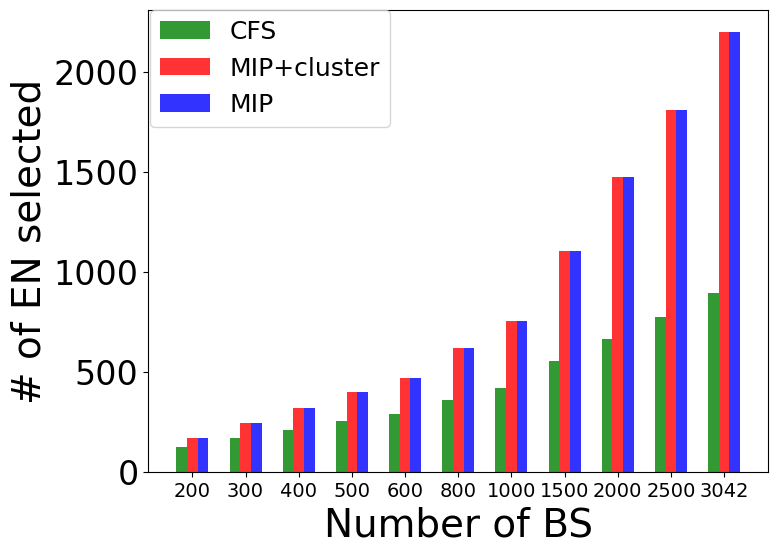

In [83]:
def plotENBar():
    theta = "0.1" #14
    x = ["200", "300", "400","500","600", "800", "1000", "1500", "2000", "2500", "3042"]
    #x = ["200", "500", "1000", "1500", "2000", "2500", "2768"]
    plot_dict = {}
    
    for method in dict[theta]:
        for i in x:
            if method in plot_dict:
                if i in dict[theta][method]:
                    plot_dict[method].append(dict[theta][method][i][0])
                else:
                    plot_dict[method].append(0)
            else:
                plot_dict.update({method:[dict[theta][method][i][0]]})
            
    print(plot_dict)
    # plot_dict['mip'][-1] = 105
    # plot_dict['mip'][-2] = 105
    # plot_dict['mip'][-3] = 105
    
    
    #fig,ax = plt.subplots()
    fig = plt.figure(figsize=(8, 6))
    
    plt.xlabel(r'Number of BS', fontsize=font)
    plt.ylabel(r'# of EN selected', fontsize=font)

    r = range(1, len(plot_dict['greedy'])+1)
    p_greedy = [i - 0.2 for i in r]
    p_greedy_new = [i for i in r]
    p_mip = [i for i in r]
    p_mip_cluster = [i + 0.2 for i in r]
    #print(p_random)
    
#     bar1 = plt.bar(p_random, height = plot_dict['random'], width = 0.2, alpha = 0.8, color = 'y',label = 'Random')                 
    bar2 = plt.bar(p_greedy,plot_dict['greedy'],width = 0.2, alpha = 0.8,color = 'g',label = 'CFS')
    # bar3 = plt.bar(p_greedy_new,plot_dict['greedy_new'],width = 0.2, alpha = 0.8,color = 'y',label = 'DA-CFS')
    bar3 = plt.bar(p_mip,plot_dict['mip_cluster'],width = 0.2, alpha = 0.8,color = 'r',label = 'MIP+cluster')
    bar4 = plt.bar(p_mip_cluster[0:11],plot_dict['mip'][0:11],width = 0.2, alpha = 0.8,color = 'b',label = 'MIP')
    
    plt.xticks(r, x, fontsize=14)
    plt.yticks(fontsize=24)
    
    plt.legend(bbox_to_anchor=(0.39, 1), loc=1, borderaxespad=0., fontsize=18)
    
    #plt.grid(True)
    plt.savefig('./img/en.png', bbox_inches = 'tight')
    
plotENBar()


{'greedy_new_fine': [864, 392, 232, 168], 'greedy_new': [864, 392, 232, 168], 'greedy_new_avg': [864, 392, 232, 168], 'greedy_avg': [892, 407, 239, 172], 'greedy': [892, 407, 239, 172], 'greedy_fine': [892, 407, 239, 172], 'mip_cluster': [2202, 1347, 776, 477], 'mip': [2201, 1337, 762, 514]}


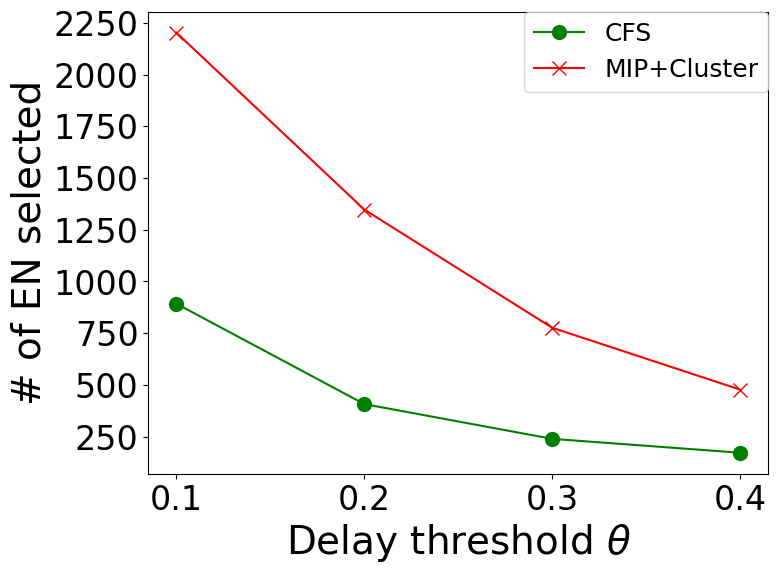

In [84]:
# dict[theta][method][bs_num] ->[en, cost, time]
def plotThetaWithEN():
    x = []
    plot_dict = {}
    bs = "3042"
    markerSize = 10
    
    for theta in dict:
        x.append(theta)
        for method in dict[theta]:
            if method in plot_dict:
                if bs in dict[theta][method]:
                    plot_dict[method].append(dict[theta][method][bs][0])
            else:
                if bs in dict[theta][method]:
                    plot_dict.update({method:[dict[theta][method][bs][0]]})
            
    print(plot_dict)
    
    
    #fig,ax = plt.subplots()
    fig = plt.figure(figsize=(8, 6))
    
    plt.xlabel(r'Delay threshold $\theta$', fontsize=font)
    plt.ylabel(r'# of EN selected', fontsize=font)
    
    plt.xticks(fontsize=24)
    plt.yticks(fontsize=24)
    
#     plt.plot(x, plot_dict['random'], "y.-", label="Random")
    plt.plot(x, plot_dict['greedy'], "go-", label="CFS", markersize=markerSize)
    # plt.plot(x, plot_dict['greedy_new'], "yv-", label="DA-CFS", markersize=markerSize)
    plt.plot(x, plot_dict['mip_cluster'], "rx-", label="MIP+Cluster", markersize=markerSize)
    # plt.plot(x, plot_dict['mip'], "bx-", label="MIP")
    
    
    plt.legend(bbox_to_anchor=(1, 1), loc=1, borderaxespad=0., fontsize=18)
    
    plt.savefig('./img/theta_en.png', bbox_inches = 'tight')
    
plotThetaWithEN()


{'greedy_new_fine': [864, 392, 232, 168], 'greedy_new': [864, 392, 232, 168], 'greedy_new_avg': [864, 392, 232, 168], 'greedy_avg': [892, 407, 239, 172], 'greedy': [892, 407, 239, 172], 'greedy_fine': [892, 407, 239, 172], 'mip_cluster': [2202, 1347, 776, 477], 'mip': [2201, 1337, 762, 514]}


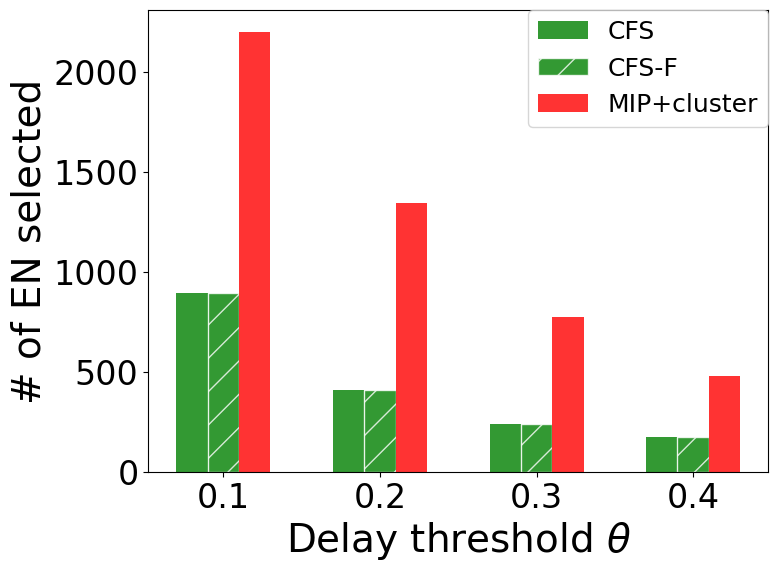

In [85]:
def plotThetaWithENBar():
    x = []
    plot_dict = {}
    bs = "3042"
    markerSize = 10
    
    for theta in dict:
        x.append(theta)
        for method in dict[theta]:
            if method in plot_dict:
                if bs in dict[theta][method]:
                    plot_dict[method].append(dict[theta][method][bs][0])
            else:
                if bs in dict[theta][method]:
                    plot_dict.update({method:[dict[theta][method][bs][0]]})
            
            
    print(plot_dict)
    
    
    #fig,ax = plt.subplots()
    fig = plt.figure(figsize=(8, 6))
    
    plt.xlabel(r'Delay threshold $\theta$', fontsize=font)
    plt.ylabel(r'# of EN selected', fontsize=font)
    
    plt.xticks(fontsize=24)
    plt.yticks(fontsize=24)
    
    r = range(1, len(plot_dict['greedy']) + 1)
    p_greedy = [i - 0.2 for i in r]
    # p_greedy_new = [i - 0.15 for i in r]
    
    p_greedy_fine = [i for i in r]
    # p_greedy_new_fine = [i + 0.15 for i in r]
    
    p_mip_cluster = [i + 0.2 for i in r]
    
    
    
    bar1 = plt.bar(p_greedy, plot_dict['greedy'], width=0.2, alpha=0.8, color='g', label='CFS')
    # bar3 = plt.bar(p_greedy_new, plot_dict['greedy_new'], width=0.15, alpha=0.8, color='y', label='DA-CFS')
    bar2 = plt.bar(p_greedy_fine, plot_dict['greedy_fine'], width=0.2, alpha=0.8, hatch = '/', edgecolor='w', color='g', label='CFS-F')
    # bar4 = plt.bar(p_greedy_new_fine, plot_dict['greedy_new_fine'], width=0.15, alpha=0.8, hatch = '\\', edgecolor='w', color='y', label='DA-CFS-F')
    bar5 = plt.bar(p_mip_cluster, plot_dict['mip_cluster'], width=0.2, alpha=0.8, color='r', label='MIP+cluster')
    # bar4 = plt.bar(p_mip_cluster[0:11], plot_dict['mip'][0:11], width=0.2, alpha=0.8, color='b', label='MIP')
    
    plt.xticks(r, x)
    plt.legend(bbox_to_anchor=(1, 1), loc=1, borderaxespad=0., fontsize=18)
    
    plt.savefig('./img/theta_en_bar.png', bbox_inches = 'tight')
    
plotThetaWithENBar()

{'greedy_new_fine': [432.0, 196.0, 116.0, 84.0], 'greedy_new': [10161.8, 5011.8, 3551.4, 2307.9], 'greedy_new_avg': [1155.2, 437.5, 253.0, 178.9], 'greedy_avg': [1327.2, 508.7, 278.1, 196.2], 'greedy': [12461.9, 6736.3, 4710.7, 3503.1], 'greedy_fine': [446.0, 203.5, 119.5, 86.0], 'mip_cluster': [2610.671, 1629.99, 1190.018, 925.272], 'mip': [2610.656, 1629.783, 1189.312, 932.929]}


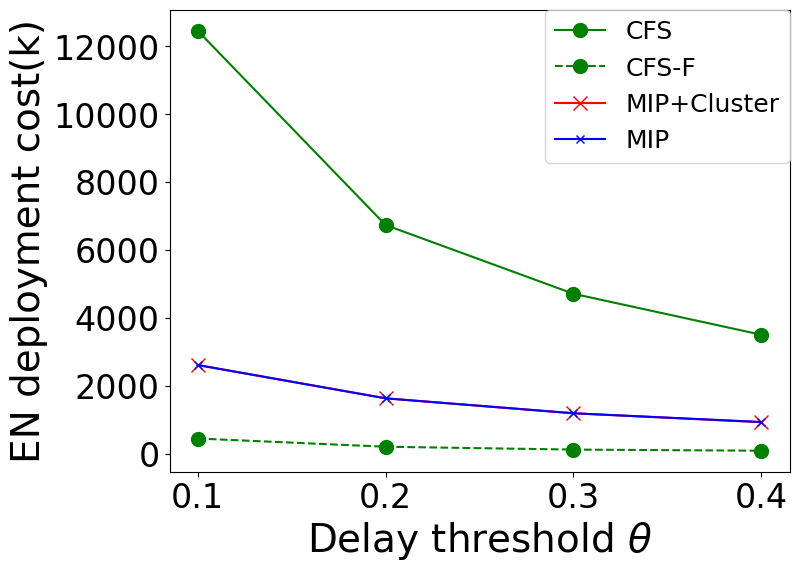

In [86]:
def plotThetaWithCost():
    x = []
    plot_dict = {}
    bs = "3042"
    markerSize = 10
    
    for theta in dict:
        x.append(theta)
        for method in dict[theta]:
            if method in plot_dict:
                if bs in dict[theta][method]:
                    value = dict[theta][method][bs][1]
                    plot_dict[method].append(value/1000)
            else:
                if bs in dict[theta][method]:
                    value = dict[theta][method][bs][1]
                    plot_dict.update({method:[value/1000]})
            
            
    print(plot_dict)
    
    
    #fig,ax = plt.subplots()
    fig = plt.figure(figsize=(8, 6))
    
    plt.xticks(fontsize=24)
    plt.yticks(fontsize=24)
    
    plt.xlabel(r'Delay threshold $\theta$', fontsize=font)
    plt.ylabel(r'EN deployment cost(k)', fontsize=font)
    
    #i - 0.2 for i in r
#     plt.plot(x, plot_dict['random'], "y.-", label="Random")
    plt.plot(x, plot_dict['greedy'], "go-", label="CFS", markersize = markerSize)
    # plt.plot(x, plot_dict['greedy_new'], "yv-", label="DA-CFS", markersize = markerSize)
    plt.plot(x, plot_dict['greedy_fine'], "go--", label="CFS-F", markersize = markerSize)
    # plt.plot(x, plot_dict['greedy_new_fine'], "yv--", label="DA-CFS-F", markersize = markerSize)
    plt.plot(x, plot_dict['mip_cluster'], "rx-", label="MIP+Cluster", markersize = markerSize)
    plt.plot(x, plot_dict['mip'], "bx-", label="MIP")
    
    
    plt.legend(bbox_to_anchor=(1, 1), loc=1, borderaxespad=0., fontsize=18)
    plt.savefig('./img/theta_cost.png', bbox_inches = 'tight')
    
plotThetaWithCost()


{'greedy_new_fine': [37.2, 15.4, 10.72, 10.39], 'greedy_new': [28.07, 8.59, 4.57, 3.12], 'greedy_new_avg': [35.7, 27.91, 28.56, 30.58], 'greedy_avg': [35.66, 27.76, 27.4, 29.16], 'greedy': [25.8, 9.13, 4.69, 2.7], 'greedy_fine': [36.05, 20.92, 13.25, 11.39], 'mip_cluster': [22.9, 39.27, 67.28, 163.51], 'mip': [111.92, 175.16, 419.86, 643.65]}


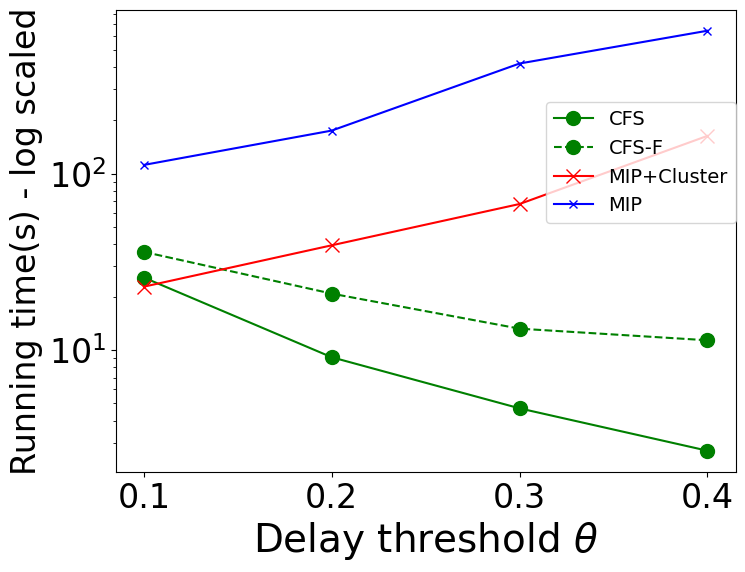

In [87]:
def plotThetaWithTimeLine():
    x = []
    plot_dict = {}
    bs = "3042"
    markerSize = 10
    
    for theta in dict:
        x.append(theta)
        for method in dict[theta]:
            if bs in dict[theta][method]:
                if method in plot_dict:
                    plot_dict[method].append(dict[theta][method][bs][2])
                else:
                    plot_dict.update({method:[dict[theta][method][bs][2]]})
            
    print(plot_dict)
    
    
    #fig,ax = plt.subplots()
    fig = plt.figure(figsize=(8, 6))
    
    plt.xticks(fontsize=24)
    plt.yticks(fontsize=24)
    
    plt.yscale("log")
    plt.xlabel(r'Delay threshold $\theta$', fontsize=font)
    plt.ylabel(r'Running time(s) - log scaled', fontsize=24)
    
    #plt.plot(x, plot_dict['random'], "y.-", label="Random")
    plt.plot(x, plot_dict['greedy'], "go-", label="CFS", markersize=markerSize)
    # plt.plot(x, plot_dict['greedy_new'], "yv-", label="DA-CFS", markersize=markerSize)
    plt.plot(x, plot_dict['greedy_fine'], "go--", label="CFS-F", markersize = markerSize)
    # plt.plot(x, plot_dict['greedy_new_fine'], "yv--", label="DA-CFS-F", markersize = markerSize)
    plt.plot(x, plot_dict['mip_cluster'], "rx-", label="MIP+Cluster", markersize=markerSize)
    plt.plot(x, plot_dict['mip'], "bx-", label="MIP")
    
    
    plt.legend(bbox_to_anchor=(1, 0.8), loc=1, borderaxespad=0., fontsize=14)
    plt.savefig('./img/theta_time.png', bbox_inches = 'tight')
    
plotThetaWithTimeLine()

In [88]:
def plot_tau():
    x = []
    en = []
    cost = []
    
    f = open("result_tau.txt")
    lines = f.readlines()

    count = 1
    for line in lines:
        if(count % 2 == 0):
            c = line.split(",") 
            #c[0]: tau, c[1]: en, c[2]: cost
            x.append(c[0])
            en.append(int(c[1]))
            cost.append(int(c[2].replace("\n",""))/1000)          
        count = count + 1
    f.close()
    
    print(x)
    print(en)
    print(cost)
    
    fig = plt.figure(figsize=(8, 6))
    
    ax = fig.add_subplot(111)
    line_cost = ax.plot(x, cost, "r.-", label="Cost")
    ax.set_ylim(150, 400)
    
    ax2 = ax.twinx()
    #line_en = ax2.plot(x, en, "ro-", label="EN #")
    r = range(1, len(en)+1)
    p= [i - 1 for i in r]
    bar_en = ax2.bar(p, en,width = 0.2, alpha = 0.8,color = 'g',label = 'EN #')
    
    ax2.set_ylim(160, 170)
    
#     ax.set_xticks(fontsize=font)
#     ax.set_yticks(fontsize=font)
#     ax2.set_xticks(fontsize=font)

    ax.set_xlabel(r'candidate number threshold $\tau$', fontsize=font)
    ax.set_ylabel(r'Cost(k)', fontsize=font)
    ax2.set_ylabel(r'# of EN', fontsize=font)
    

    
    plt.legend(handles = [line_cost[0], bar_en], bbox_to_anchor=(1, 1), loc=1, borderaxespad=0., fontsize=font)
    
    #plt.legend(bbox_to_anchor=(1, 1), loc=1, borderaxespad=0.)
    plt.savefig('./img/tau.png', bbox_inches = 'tight')
    
# plot_tau()

In [89]:
import matplotlib.pyplot as plt
def process_distribution():
    dict = {}
    f = open("distribution.txt")
    lines = f.readlines()

    for line in lines[0:]:
        c = line.split(",") 
        #c[0]: name, c[1]: theta, c[2]: bs num, c[3]: trans delay, c[4]: comp delay
        method = c[0]
        theta = c[1]
        bs_num = c[2]
        trans = float(c[3])
        comp = float(c[4].replace("\n",""))
        
        if theta in dict:
            if method in dict[theta]:
                if bs_num in dict[theta][method]:
                    dict[theta][method][bs_num].append([trans, comp])
                else:
                    dict[theta][method].update({bs_num: [[trans, comp]]})
            else:
                dict[theta].update({method: {}})
        else:
            dict.update({theta: {}})
    f.close()
    #print(dict)
    return dict

    
dict = process_distribution()

In [90]:
def plot_dist_bar():
    theta = "0.1"
    method = "greedy"
    bs_num = "2500"
    
    x = []
    y_random = []
    y_greedy = []
    y_greedy_new = []
    
    for i in range(theta):
        x.append(i + 1)
        y_random.append(0)
        y_greedy.append(0)
        y_greedy_new.append(0)
         
#     for method in dict[theta]
#     for item in dict[theta]["random"][bs_num][0:]:
#         cate = int(item[0]%14)
#         y_random[cate] = y_random[cate] + 1
#
    for item in dict[theta]["greedy"][bs_num][0:]:
        cate = int(item[0]%14)
        y_greedy[cate] = y_greedy[cate] + 1
        
    for item in dict[theta]["greedy_new"][bs_num][0:]:
        cate = int(item[0]%14)
        y_greedy_new[cate] = y_greedy_new[cate] + 1

    print(y_random)
    print(y_greedy)
    print(y_greedy_new)
    
    r = range(1, len(x)+1)
    p = [i for i in r]
    
 #fig,ax = plt.subplots()
    fig = plt.figure(figsize=(8, 6))
    
    plt.xlabel(r'Transmission Delay')
    plt.ylabel(r'# of BS on $\theta$ = 10')

    r = range(1, len(x)+1)
    p_random = [i - 0.2 for i in r]
    p_greedy = [i for i in r]
    p_greedy_new = [i + 0.2 for i in r]
    #p_mip = [i + 0.4 for i in r]
    #print(p_random)
    
#     bar1 = plt.bar(p_random, height = y_random, width = 0.2, alpha = 0.8, color = 'y',label = 'Random')                 
#     bar2 = plt.bar(p_greedy,y_greedy,width = 0.2, alpha = 0.8,color = 'g',label = 'CFS') 
#     bar3 = plt.bar(p_greedy_new,y_greedy_new,width = 0.2, alpha = 0.8,color = 'b',label = 'DA-CFS') 

    # bar1 = plt.bar(p_greedy, height = y_random, width = 0.6, alpha = 0.6, color = 'y',label = 'Random')
    bar2 = plt.bar(p_greedy,y_greedy,width = 0.6, alpha = 0.6,color = 'g',label = 'CFS') 
    bar3 = plt.bar(p_greedy,y_greedy_new,width = 0.6, alpha = 0.6,color = 'b',label = 'DA-CFS') 
    #bar4 = plt.bar(p_mip,plot_dict['mip'],width = 0.2, alpha = 0.8,color = 'r',label = 'MIP')
    plt.xticks(r,x) 

    plt.legend(bbox_to_anchor=(0.175, 1), loc=1, borderaxespad=0.)
    plt.savefig('./img/distribution.png', bbox_inches = 'tight')

    #plt.grid(True)
    plt.show()

# plot_dist_bar()

In [91]:
def plot_dist_line():
    theta = "0.1"
    method = "greedy"
    bs_num = "2769"
    
    x = []
    y_random = []
    y_greedy = []
    y_greedy_new = []
    
    for i in range(int(float(theta))):
        x.append(i + 1)
        y_random.append(0)
        y_greedy.append(0)
        y_greedy_new.append(0)
         
#     for method in dict[theta]
    for item in dict[theta]["random"][bs_num][0:]:
        cate = int(item[0]%14)
        y_random[cate] = y_random[cate] + 1
        
    for item in dict[theta]["greedy"][bs_num][0:]:
        cate = int(item[0]%14)
        y_greedy[cate] = y_greedy[cate] + 1
        
    for item in dict[theta]["greedy_new"][bs_num][0:]:
        cate = int(item[0]%14)
        y_greedy_new[cate] = y_greedy_new[cate] + 1

    print(y_random)
    print(y_greedy)
    print(y_greedy_new)
    
    r = range(1, len(x)+1)
    p = [i for i in r]

    #fig,ax = plt.subplots()
    fig = plt.figure(figsize=(8, 6))
    
    plt.xlabel(r'Transmission Delay')
    plt.ylabel(r'# of BS on $\theta$ = 10')
    
    #i - 0.2 for i in r
    plt.plot(x, y_random, "y.-", label="Random")
    plt.plot(x, y_greedy, "rx-", label="CFS")
    plt.plot(x, y_greedy_new, "bv-", label="DA-CFS")
    
    plt.legend(bbox_to_anchor=(0.175, 1), loc=1, borderaxespad=0.)

    plt.savefig('./img/distribution.png', bbox_inches = 'tight')

    #plt.grid(True)
    plt.show()
    
#plot_dist_line()

In [92]:

def plot_dist_his_random():
    theta = "22.0"
    method = "random"
    bs_num = "2769"
    
    data = [(int(i[0])%14)/10 for i in dict[theta]["random"][bs_num]]
    #print(data[0:50])
    
    fig = plt.figure(figsize=(8, 6))
    
    plt.xticks(fontsize=24)
    plt.yticks(fontsize=24)
    
    plt.xlabel(r'Proportion of transmission delay', fontsize=font)
    plt.ylabel(r'# of BS', fontsize=font)
    
    plt.hist(data, bins = 10,align='mid',range=[0, 1],facecolor='y', edgecolor='black',alpha=0.7)
    plt.savefig('./img/dist_random.png', bbox_inches = 'tight')
    plt.show()
    
# plot_dist_his_random()

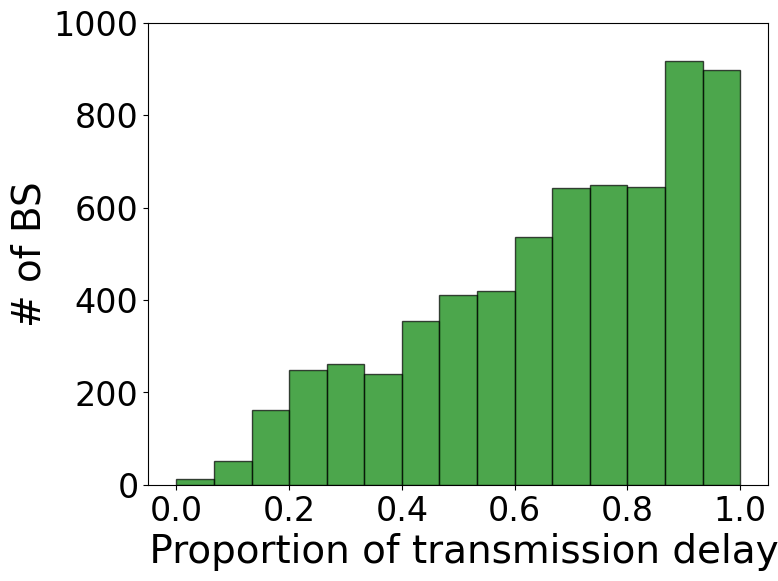

In [93]:
def plot_dist_his_cfs():
    theta = "0.1"
    method = "greedy"
    bs_num = "3042"
    
    # data = [(int(i[0])%14)/15 for i in dict[theta][method][bs_num]]
    data = [i[0]*10 for i in dict[str(theta)][method][bs_num]]
    #print(data[0:50])
    
    fig = plt.figure(figsize=(8, 6))
    
    plt.xticks(fontsize=24)
    plt.yticks(fontsize=24)
    
    plt.xlabel(r' Proportion of transmission delay', fontsize=font)
    plt.ylabel(r'# of BS', fontsize=font)
    plt.ylim(0,1000)
    
    plt.hist(data, bins = 15,align='mid',range=[0, 1],facecolor='g', edgecolor='black',alpha=0.7)
    plt.savefig('./img/dist_cfs.png', bbox_inches = 'tight')
    plt.show()
    
plot_dist_his_cfs()

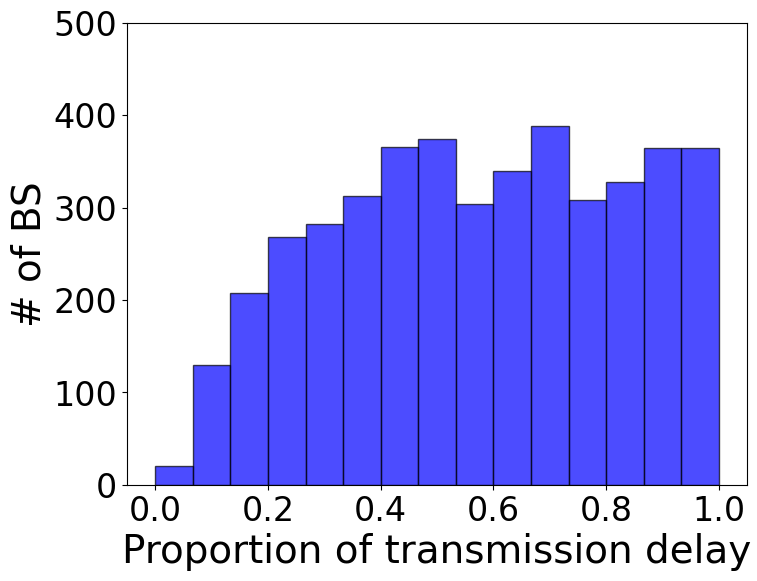

In [94]:
def plot_dist_his_dacfs():
    theta = "0.1"
    method = "greedy_new"
    bs_num = "3042"
    
    # data = [(int(i[0])%14)/15 for i in dict[theta][method][bs_num]]
    data = [i[0]*10 for i in dict[str(theta)][method][bs_num]]
    #print(data[0:50])
    
    fig = plt.figure(figsize=(8, 6))
    
    plt.xticks(fontsize=24)
    plt.yticks(fontsize=24)
    
    plt.xlabel(r'Proportion of transmission delay', fontsize=font)
    plt.ylabel(r'# of BS', fontsize=font)
    plt.ylim(0, 500)
    
    plt.hist(data, bins = 15,align='mid',range=[0, 1],facecolor='b', edgecolor='black',alpha=0.7)
    plt.savefig('./img/dist_dacfs.png', bbox_inches = 'tight')
    plt.show()
    
plot_dist_his_dacfs()

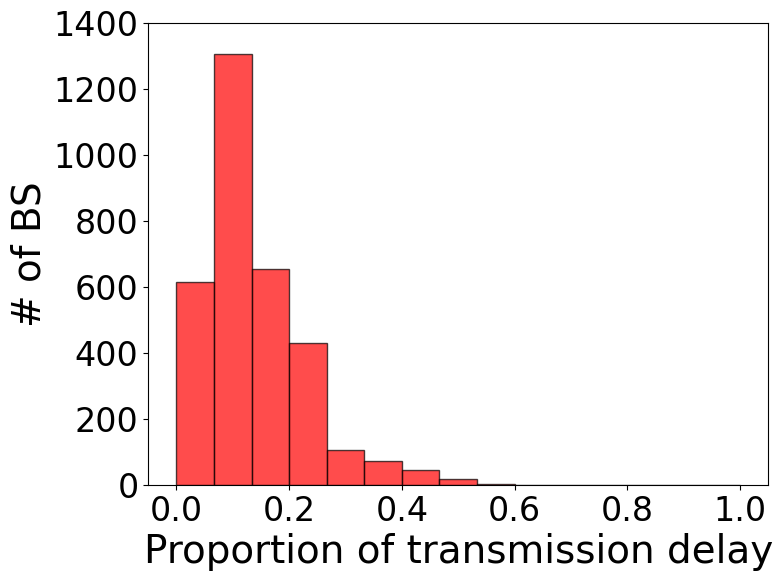

In [95]:
def plot_dist_his_cmip():
    theta = "0.1"
    method = "mip_cluster"
    bs_num = "3042"
    
    # data = [(int(i[0])%22)/15 for i in dict[theta][method][bs_num]]
    data = [i[0]*10 for i in dict[str(theta)][method][bs_num]]
    #print(data[0:50])
    
    fig = plt.figure(figsize=(8, 6))
    
    plt.xticks(fontsize=24)
    plt.yticks(fontsize=24)
    
    plt.xlabel(r'Proportion of transmission delay', fontsize=font)
    plt.ylabel(r'# of BS', fontsize=font)
    plt.ylim(0, 1400)
    
    plt.hist(data, bins = 15,align='mid',range=[0, 1],facecolor='r', edgecolor='black',alpha=0.7)
    plt.savefig('./img/dist_mip_cluster.png', bbox_inches = 'tight')
    plt.show()
    
plot_dist_his_cmip()